In [1]:
# Import required libraries

#Data Analysis libaries
import pandas as pd
import numpy as np

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Machine Learning and Evaluation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

import warnings
warnings.filterwarnings("ignore")

In [7]:
# Load data
data = pd.read_csv(r"C:\Users\USER\Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
data.shape

(200, 5)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<bound method DataFrame.sum of      CustomerID  Genre    Age  Annual_Income_(k$)  Spending_Score
0         False  False  False               False           False
1         False  False  False               False           False
2         False  False  False               False           False
3         False  False  False               False           False
4         False  False  False               False           False
..          ...    ...    ...                 ...             ...
195       False  False  False               False           False
196       False  False  False               False           False
197       False  False  False               False           False
198       False  False  False               False           False
199       False  False  False               False           False

[200 rows x 5 columns]>


<Axes: >

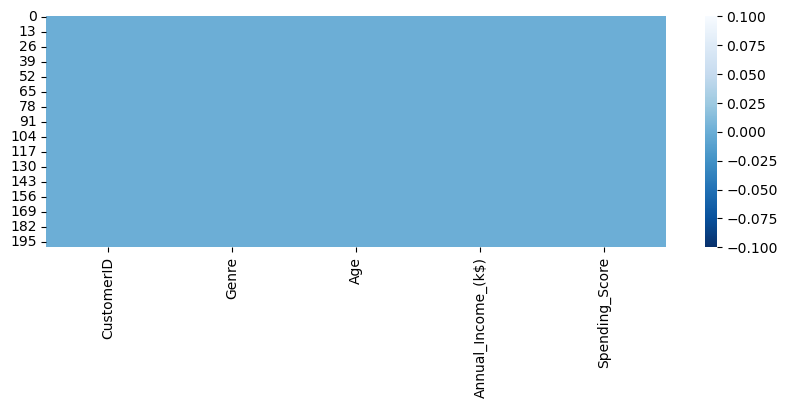

In [19]:
# check for missing values
print(data.isnull().sum)

#visualizing the missing data
plt.figure(figsize = (10,3))
sns.heatmap(data.isnull(), cbar= True, cmap = "Blues_r")

### Data Cleaning and Pre-Processing

In [22]:
# Check for duplicates
print(data.duplicated().sum())

0


### Exploratory Data Analysis

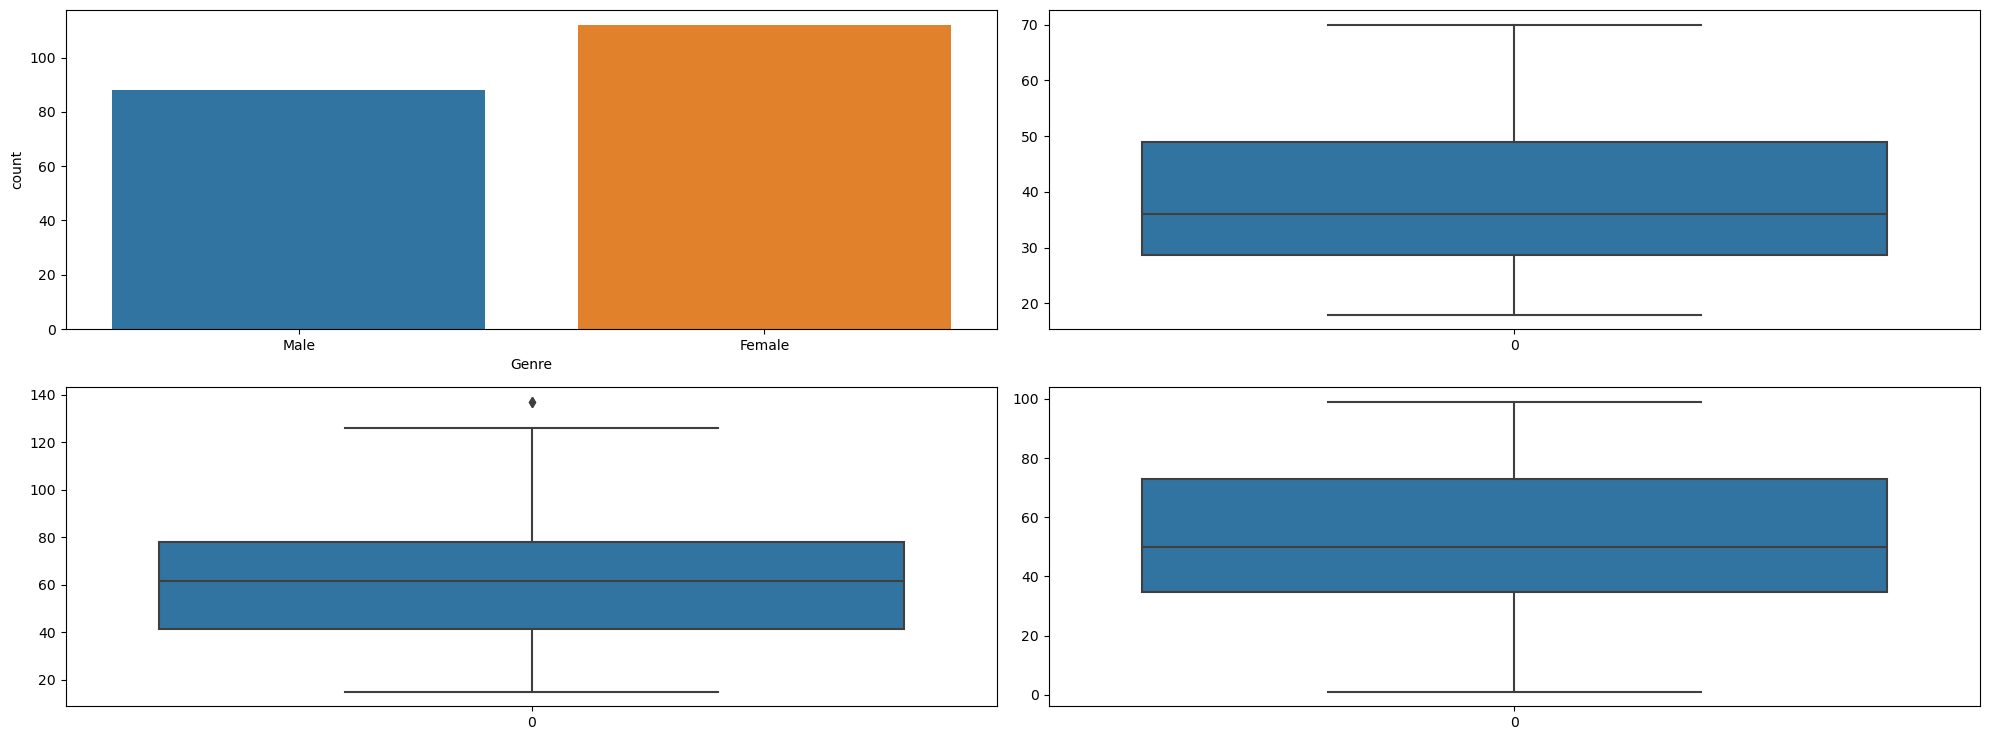

In [31]:
fig, axs = plt.subplots(2,2, figsize = (20,7.5))
plt1 = sns.countplot(x=data['Genre'], ax =axs[0,0])
plt2 = sns.boxplot(data['Age'], ax =axs[0,1])
plt3 = sns.boxplot(data['Annual_Income_(k$)'], ax = axs[1,0])
plt4 = sns.boxplot(data['Spending_Score'], ax = axs[1,1])

plt.tight_layout()

In [33]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder() #method initialization

#Looping for columns except survived
for c in data.columns[1:]:
    if(data[c].dtype=='object'):
        data[c] = encoder.fit_transform(data[c])
    else:
        data[c] = data[c]

data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [35]:
#Remove CustomerID column
data.drop('CustomerID', axis = 1, inplace = True)
data.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


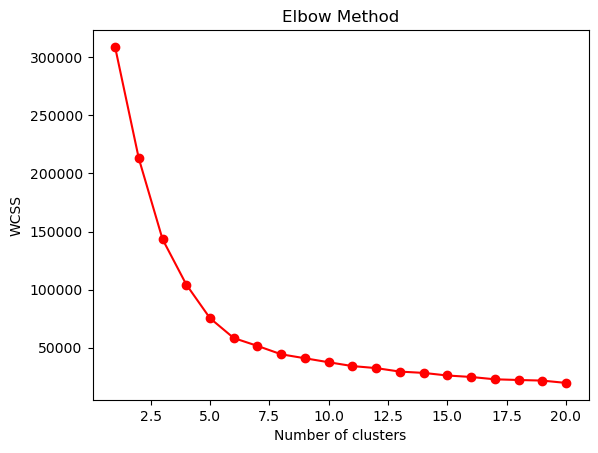

In [41]:
#Determine optimal number of clusters
wcss = []
for i in range (1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss, color = 'red', marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [45]:
# Fit K-Means clustering model
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit(data)

#Add cluster labels to data
data['Cluster'] = kmeans.labels_

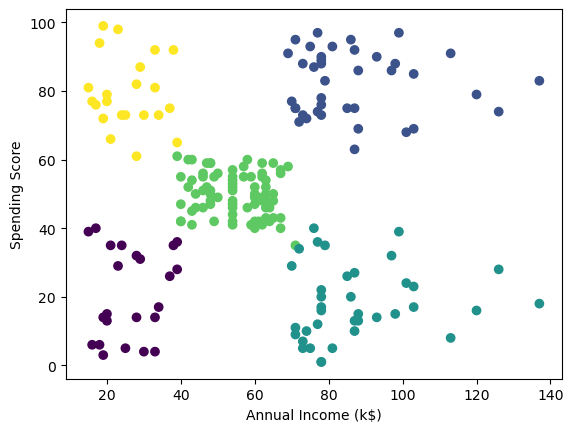

0.44493777835059417

In [47]:
#visualize cluster results
plt.scatter(data['Annual_Income_(k$)'], data['Spending_Score'], c= data['Cluster'], label= 'centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

#calculate silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(data, kmeans.labels_)

#### In conclusion, the first cluster, cluster 1 (purple), are low income earners with low spending score, cluster 2 (yellow) are low income earners with high spending score, cluster 3 (green) are mid income earners with mid spending score, cluster 4 (blue) are high income earners with high spending score and the last, cluster 5 (dark green) are high income earners with low spending score